In [3]:
import numpy as np
from numpy import pi
from scipy.interpolate import interp1d
from scipy.integrate import quad, odeint
from matplotlib import pyplot as plt

from matplotlib.patches import Polygon, Rectangle


# sometimes qt not working if plt.rc('text', usetex=True) && plt.rc('font', family='serif') are enabled.
# %matplotlib qt
%matplotlib inline
plt.rc('text', usetex=True)
plt.rc('font', family='serif')




In [4]:
eV = 1.0
gram = 5.610e32 *eV
kg = 1e3 *gram
sec_inv = 6.582e-16 *eV
cm_inv = 1.973e-5 *eV
cm=cm_inv**(-1);
sec = sec_inv**(-1);
meter = 100 *cm;
MeV = 1e6 *eV;
GeV = 1e3 *MeV;

GN = 6.67e-11 * meter**3 *kg**(-1) *sec**(-2)
GF=1.16637e-5 * GeV**(-2)
nucleon_mass=931*MeV


def alpha_g(g):
    u=nucleon_mass
    return g**2/(4*pi*GN*u**2)

def g_alpha(alpha):
    u=nucleon_mass
    return 2*(alpha*GN*pi)**0.5*u

In [5]:
gravity_strongest_alpha=10**np.loadtxt(r"data/gravity_strongest.csv",delimiter=",")
gravity_strongest_g=np.array([g_alpha(x[1]) for x in gravity_strongest_alpha])
gravity_strongest_m=np.array([1./(x[0] * meter) for x in gravity_strongest_alpha])

LLR_alpha=10**np.loadtxt(r"data/LLR1.csv",delimiter=",")
LLR1_g=np.array([g_alpha(x[1]) for x in LLR_alpha])
LLR1_m=np.array([1./(x[0] * meter) for x in LLR_alpha])
LLR_alpha=10**np.loadtxt(r"data/LLR2.csv",delimiter=",")
LLR2_g=np.array([g_alpha(x[1]) for x in LLR_alpha])
LLR2_m=np.array([1./(x[0] * meter) for x in LLR_alpha])


muonic_data=[
10**np.loadtxt(r"data/muonic_"+str(i)+".csv",delimiter=",") 
for i in np.arange(1,9+1)
]

BH_bounds=[
[4e-14,2e-11],
[5e-20,1.1e-19],
[1.8e-19, 2e-17]
]

Heeck_data=[
10**np.loadtxt(r"data/Heeck_"+str(i)+".csv",delimiter=",") 
for i in np.arange(1,2+1)
]
Heeck_data[1][0,0]=1e-20;
Heeck_data[1][0,1]=Heeck_data[1][1,1];

# $m_\phi$-$y_{ee}$ plot

In [6]:
execfile(r"data/gravity_bounds.py")

# print (loop_factor)

8.00651957311e-22


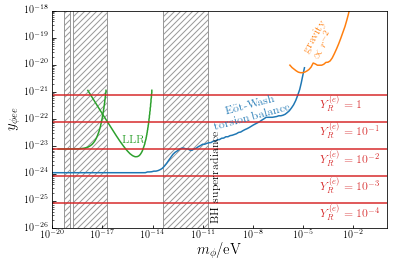

In [9]:
me=0.511 * MeV
m_nu=0.01 * eV
yR=1.0
loop_factor=3*yR*me*m_nu *GF /(16.0*(2.0**0.5)*pi**2)
print (loop_factor)


plt.xscale("log")
plt.yscale("log")
plt.tick_params(which="both",direction="in")
y_range=(1e-26,1e-18)
plt.ylim(y_range)
x_range=(1e-20,1e0)
plt.xlim(x_range)


textsize=12
data=Heeck_data[1]
plt.plot(data[:,0],data[:,1],color="C0")    
plt.text(s=r"E\"ot-Wash \\ torsion balance",x=0.3e-10,y=2e-22,fontsize=textsize,rotation=15,color="C0")

data=Heeck_data[0]
plt.plot(data[:,0],data[:,1],color="C1")    
plt.text(s=r"gravity \\ $~~~~\propto r^{-2}$",x=1e-5,y=1e-19,fontsize=textsize,rotation=60,color="C1")
# plt.text(s=r"$\propto r^{-2}$",x=1e-3,y=1e-19,fontsize=15,rotation=60,color="C1")
# plt.text(s=r"inverse-square law",x=1e-2,y=1e-21,fontsize=15,rotation=0,color="C1")


plt.plot(LLR2_m,LLR2_g,color="C2")
plt.plot(LLR1_m,LLR1_g,color="C2")    
plt.text(s=r"LLR",x=1.5e-16,y=1.3e-23,fontsize=textsize,rotation=0,color="C2")

ax=plt.axes()
for BH_bound in BH_bounds:
    (bound_left,bound_right)=BH_bound
    ax.add_patch(Rectangle(xy=(bound_left,1e-30),width=bound_right-bound_left,height=1,color="#999999",
                           fill=False,hatch="////"))
plt.text(s=r"BH superradiance",x=3.0e-11,y=1.7e-23,fontsize=textsize,rotation=90,color="k")



for lgyR in np.arange(0.0,-5,-1):
    y= loop_factor*10**lgyR
    plt.plot(x_range,[y,y],ls="-",color="C3")
    if lgyR<0:
        text=r"$Y_R^{(e)}=10^{"+str(int(lgyR))+"}$"
    else:
        text=r"$Y_R^{(e)}=1$"    
    plt.text(s=text,x=1e-4,y=0.25*y,fontsize=textsize,rotation=0,color="C3")


    

plt.xlabel(r"$m_{\phi}/$eV ",fontsize=15)
plt.ylabel(r"$y_{\phi e e}$",fontsize=15)


# plt.savefig(r'../draft/fig/y_ee.pdf',
#            bbox_inches='tight')
plt.show()

# $m_\phi$-$y_{\mu\mu}$ plot

4.96654906905e-19


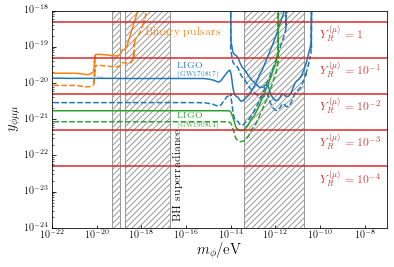

In [20]:
m_mu=105.66 * MeV
m_nu=0.03 * eV
yR=1.0
loop_factor=3*yR*m_mu*m_nu *GF /(16.0*(2.0**0.5)*pi**2)
print (loop_factor)

textsize=12

plt.xscale("log")
plt.yscale("log")
plt.tick_params(which="both",direction="in")
y_range=(1e-24,1e-18)
plt.ylim(y_range)
x_range=(1e-22,1e-7)
plt.xlim(x_range)

for BH_bound in BH_bounds:
    (bound_left,bound_right)=BH_bound
    plt.axes().add_patch(Rectangle(xy=(bound_left,1e-30),width=bound_right-bound_left,height=1,color="#999999",
                           fill=False,hatch="////"))
plt.text(s=r"BH superradiance",x=2.5e-17,y=3e-22,fontsize=textsize,rotation=90,color="k")

# for data in muonic_data[0:8]:
#     plt.plot(data[:,0],data[:,1])
data=muonic_data[0]    
plt.plot(data[:,0],data[:,1],color="C0")
data=muonic_data[1]    
plt.plot(data[:,0],data[:,1],ls="--",color="C0")
data=muonic_data[4]    
plt.plot(data[:,0],data[:,1],ls="--",color="C0")
data=muonic_data[5]    
plt.plot(data[:,0],data[:,1],color="C0")
plt.text(s="LIGO",x=4e-17,y=2.5e-20,fontsize=0.8*textsize,rotation=0,color="C0")
plt.text(s="(GW170817)",x=4e-17,y=1.5e-20,fontsize=0.5*textsize,rotation=0,color="C0")


data=muonic_data[2]    
plt.plot(data[:,0],data[:,1],color="C2")
data=muonic_data[3]    
plt.plot(data[:,0],data[:,1],ls="--",color="C2")
plt.text(s="LIGO",x=4e-17,y=1e-21,fontsize=0.8*textsize,rotation=0,color="C2")
plt.text(s="(GW190814)",x=4e-17,y=0.6e-21,fontsize=0.5*textsize,rotation=0,color="C2")

data=muonic_data[6]   
plt.plot(data[:,0],data[:,1],ls="--",color="C1")
data=muonic_data[7]   
plt.plot(data[:,0],data[:,1],ls="-",color="C1")
plt.text(s="Binary pulsars",x=1.5e-18,y=2e-19,fontsize=textsize,rotation=0,color="C1")

    

# for y in loop_factor*10**np.arange(0.0,-5,-1):
#     plt.plot(x_range,[y,y],ls="--",color="k")

for lgyR in np.arange(0.0,-5,-1):
    y= loop_factor*10**lgyR
    plt.plot(x_range,[y,y],ls="-",color="C3")
    if lgyR<0:
        text=r"$Y_R^{(\mu)}=10^{"+str(int(lgyR))+"}$"
    else:
        text=r"$Y_R^{(\mu)}=1$"    
    plt.text(s=text,x=1e-10,y=0.3*y,fontsize=textsize,rotation=0,color="C3")

plt.xlabel(r"$m_{\phi}/$eV ",fontsize=15)
plt.ylabel(r"$y_{\phi \mu \mu}$",fontsize=15)

# plt.savefig(r'../draft/fig/y_mumu.pdf',
#            bbox_inches='tight')
plt.show()

# Delete